In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
import plotly
import plotly.express as px
import numpy as np

In [3]:
data = pd.read_csv("C:\\Users\\Айдана\\Downloads\\supermarket-sales\\supermarket_sales - Sheet1.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [19]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [20]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [21]:
data.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


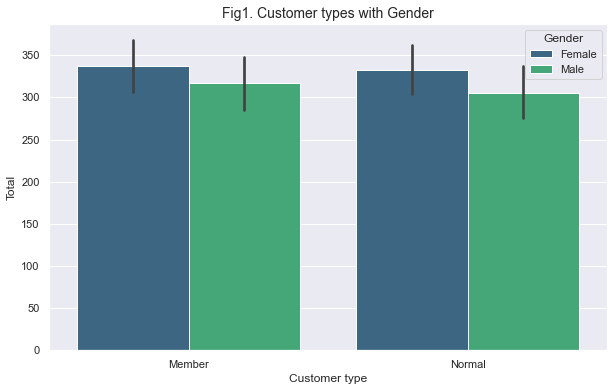

In [33]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
plt.title("Fig1. Customer types with Gender",fontsize=14)
ax = sns.barplot(x="Customer type", y="Total", hue="Gender", data=data,palette="viridis",saturation=0.75)

In [23]:
group = data.groupby(['Branch', 'Product line'])['Total'].aggregate('count').unstack()

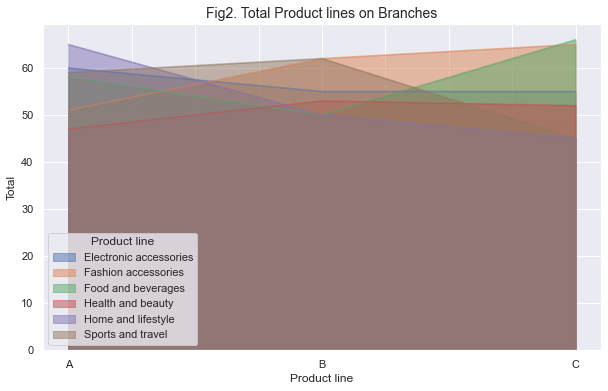

In [32]:
group.plot(kind='area', 
             stacked=False,
             figsize=(10, 6), 
             )

plt.title('Fig2. Total Product lines on Branches',fontsize=14)
plt.ylabel('Total')
plt.xlabel('Product line')

plt.show()

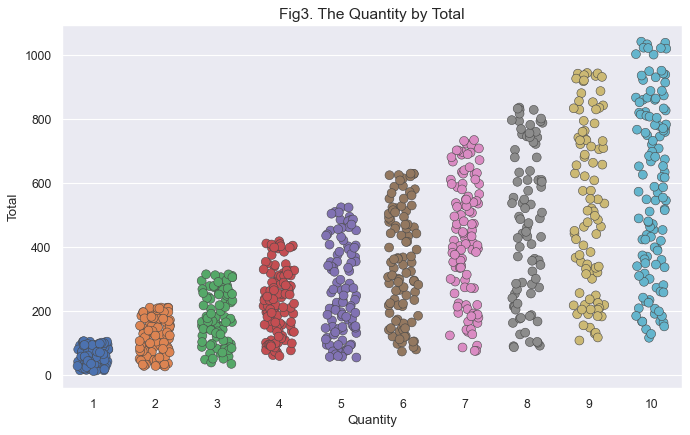

In [31]:
fig, ax = plt.subplots(figsize=(10,6), dpi= 80)    
sns.stripplot(data.Quantity, data.Total, jitter=0.25, size=8, ax=ax, linewidth=.5)
plt.title('Fig3. The Quantity by Total', fontsize=14)
plt.show()

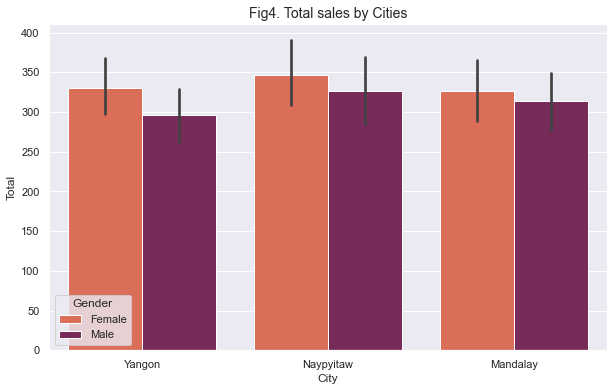

In [44]:
plt.figure(figsize=(10,6))
plt.title("Fig4. Total sales by Cities",fontsize=14)
ax = sns.barplot(x="City", y="Total", data=data,palette="rocket_r",hue="Gender")
plt.show()

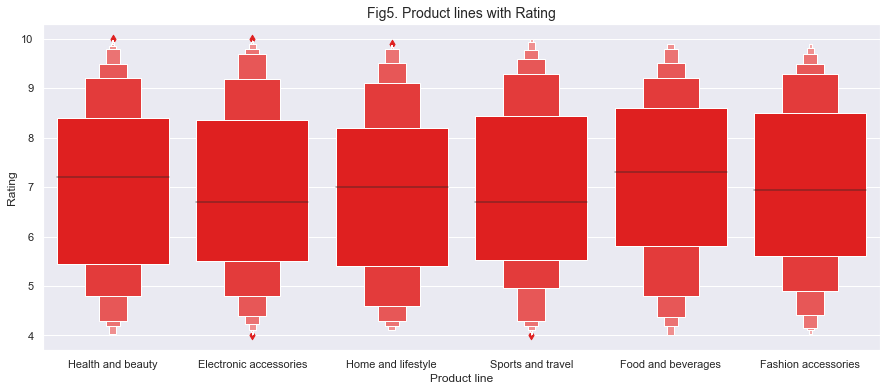

In [58]:
plt.figure(figsize=(15,6))
plt.title("Fig5. Product lines with Rating",fontsize=14)
sns.boxenplot(x="Product line", y="Rating",
              color="red",
              scale="exponential", data=data)

Text(0, 0.5, 'Product Line')

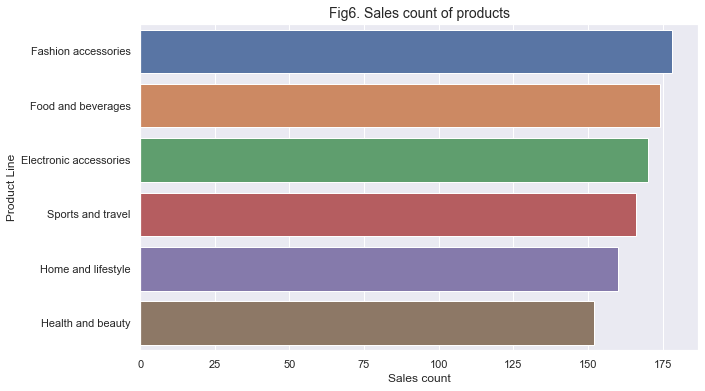

In [68]:
plt.figure(figsize=(10,6))
ax = sns.countplot(y='Product line', data=data, order = data['Product line'].value_counts().index)
ax.set_title(label = "Fig6. Sales count of products",fontsize=14)
ax.set_xlabel(xlabel = "Sales count", fontsize = 12)
ax.set_ylabel(ylabel= "Product Line", fontsize = 12)

In [69]:
gmargin_group= data.groupby("Product line")["gross margin percentage"].sum()
gincome_group= data.groupby("Product line")["gross income"].sum()

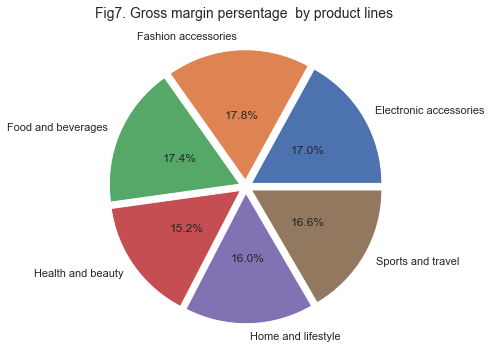

In [71]:
pie, ax = plt.subplots(figsize=[10,6])
labels = gmargin_group.keys()
plt.pie(x=gmargin_group,autopct="%.1f%%",explode=[0.05]*6, labels=labels, pctdistance=0.5)
plt.title("Fig7. Gross margin persentage  by product lines ", fontsize=14);

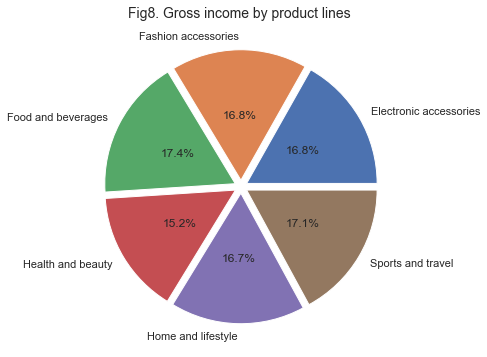

In [73]:
pie, ax = plt.subplots(figsize=[10,6])
labels = gincome_group.keys()
plt.pie(x=gincome_group,autopct="%.1f%%",explode=[0.05]*6, labels=labels, pctdistance=0.5)
plt.title("Fig8. Gross income by product lines ", fontsize=14);